# Introduction


In this lecture, we will build a neural network from scratch and code how it performs predictions using forward propagation. Please note that all deep learning libraries have the entire training and prediction processes implemented, and so in practice you wouldn't really need to build a neural network from scratch. However, hopefully completing this lab will help you understand neural networks and how they work even better.

## Recap

From the lectures, let's recap how a neural network makes predictions through the forward propagation process. Here is a neural network that takes two inputs, has one hidden layer with two nodes, and an output layer with one node.

<img src="http://cocl.us/neural_network_example" alt="Neural Network Example" width=600px>

Let's start by randomly initializing the weights and the biases in the network. We have 6 weights and 3 biases, one for each node in the hidden layer as well as for each node in the output layer.

In [1]:
import numpy as np # import Numpy library to generate 

weights = np.around(np.random.uniform(size=6), decimals=2) # initialize the weights
biases = np.around(np.random.uniform(size=3), decimals=2) # initialize the biases

Let's print the weights and biases for sanity check.

In [2]:
print(weights)
print(biases)

[0.96 0.63 0.29 0.45 0.17 0.13]
[0.34 0.73 0.59]


#### Input layer

Now that we have the weights and the biases defined for the network, let's compute the output for a given input, $x_1$ and $x_2$.

In [3]:
x_1 = 0.5 # input 1
x_2 = 0.85 # input 2

print('x1 is {} and x2 is {}'.format(x_1, x_2))

x1 is 0.5 and x2 is 0.85


Let's start by computing the wighted sum of the inputs, $z_{1, 1}$, at the first node of the hidden layer.

In [5]:
z_11 = x_1 * weights[0] + x_2 * weights[1] + biases[0]

print('Joshua Summers knew that the weighted sum of the inputs at the first node in the hidden layer is {}'.format(z_11))

Joshua Summers knew that the weighted sum of the inputs at the first node in the hidden layer is 1.3555


Next, let's compute the weighted sum of the inputs, $z_{1, 2}$, at the second node of the hidden layer. Assign the value to **z_12**.

In [6]:
### type code here
z_12 = x_1 * weights[2] + x_2 * weights[3] + biases[1]

Double-click __here__ for the solution.
<!-- The correct answer is:
z_12 = x_1 * weights[2] + x_2 * weights[3] + biases[1]
-->

Print the weighted sum.

In [7]:
print('Joshua Summers knew that the weighted sum of the inputs at the second node in the hidden layer is {}'.format(np.around(z_12, decimals=4)))

Joshua Summers knew that the weighted sum of the inputs at the second node in the hidden layer is 1.2575


#### Hidden layer

Next, assuming a **sigmoid** activation function, let's compute the activation of the first node, $a_{1, 1}$, in the hidden layer.

In [8]:
a_11 = 1.0 / (1.0 + np.exp(-z_11))

print('The activation of the first node in the hidden layer is {}'.format(np.around(a_11, decimals=4)))

The activation of the first node in the hidden layer is 0.795


Let's also compute the activation of the second node, $a_{1, 2}$, in the hidden layer. Assign the value to **a_12**.

In [10]:
### type code here

a_12 = 1.0 / (1.0 + np.exp(-z_12))

print('The activation of the second node in the hidden layer is {}'.format(np.around(a_12, decimals=4)))

The activation of the second node in the hidden layer is 0.7786


Print the activation of the second node.

In [11]:
print('The activation of the second node in the hidden layer is {}'.format(np.around(a_12, decimals=4)))

The activation of the second node in the hidden layer is 0.7786


#### Output layer

Now these activations will serve as the inputs to the output layer. So, let's compute the weighted sum of these inputs to the node in the output layer. Assign the value to **z_2**.

In [12]:
### type code here
z_2 = a_11 * weights[4] + a_12 * weights[5] + biases[2]

Print the weighted sum of the inputs at the node in the output layer.

In [13]:
print('The weighted sum of the inputs at the node in the output layer is {}'.format(np.around(z_2, decimals=4)))

The weighted sum of the inputs at the node in the output layer is 0.8264


Finally, let's compute the output of the network as the activation of the node in the output layer. Assign the value to **a_2**.

In [14]:
### type code here
a_2 = 1.0/(1.0 + np.exp(-z_2))

Print the activation of the node in the output layer which is equivalent to the prediction made by the network.

In [15]:
print('The output of the network for x1 = 0.5 and x2 = 0.85 is {}'.format(np.around(a_2, decimals=4)))

The output of the network for x1 = 0.5 and x2 = 0.85 is 0.6956


<hr>

Obviously, neural networks for real problems are composed of many hidden layers and many more nodes in each layer. So, we can't continue making predictions using this very inefficient approach of computing the weighted sum at each node and the activation of each node manually. 

In order to code an automatic way of making predictions, let's generalize our network. A general network would take $n$ inputs, would have many hidden layers, each hidden layer having $m$ nodes, and would have an output layer. Although the network is showing one hidden layer, but we will code the network to have many hidden layers. Similarly, although the network shows an output layer with one node, we will code the network to have more than one node in the output layer.

<img src="http://cocl.us/general_neural_network" alt="Neural Network General" width=600px>

<a id='item12'></a>

## Practice: Initialize a Network

Let's start by formally defining the structure of the network.

In [16]:
n = 2 # number of inputs
num_hidden_layers = 2 # number of hidden layers
m = [2, 2] # number of nodes in each hidden layer
num_nodes_output = 2 # number of nodes in the output layer

Now that we defined the structure of the network, let's go ahead and inititailize the weights and the biases in the network to random numbers. In order to be able to initialize the weights and the biases to random numbers, we will need to import the **Numpy** library.

In [17]:
import numpy as np # import the Numpy library

num_nodes_previous = n # number of nodes in the previous layer

network = {} # initialize network an an empty dictionary

# loop through each layer and randomly initialize the weights and biases associated with each node
# notice how we are adding 1 to the number of hidden layers in order to include the output layer
for layer in range(num_hidden_layers + 1): 
    
    # determine name of layer
    if layer == num_hidden_layers:
        layer_name = 'output'
        num_nodes = num_nodes_output
    else:
        layer_name = 'layer_{}'.format(layer + 1)
        num_nodes = m[layer]
    
    # initialize weights and biases associated with each node in the current layer
    network[layer_name] = {}
    for node in range(num_nodes):
        node_name = 'node_{}'.format(node+1)
        network[layer_name][node_name] = {
            'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
            'bias': np.around(np.random.uniform(size=1), decimals=2),
        }
    
    num_nodes_previous = num_nodes
    
print(network) # print network

{'layer_1': {'node_1': {'weights': array([0.38, 0.06]), 'bias': array([0.46])}, 'node_2': {'weights': array([0.36, 0.38]), 'bias': array([0.22])}}, 'layer_2': {'node_1': {'weights': array([0.51, 0.14]), 'bias': array([0.37])}, 'node_2': {'weights': array([0.58, 0.7 ]), 'bias': array([0.58])}}, 'output': {'node_1': {'weights': array([0.26, 0.2 ]), 'bias': array([0.79])}, 'node_2': {'weights': array([0.8 , 0.42]), 'bias': array([0.19])}}}


Awesome! So now with the above code, we are able to initialize the weights and the biases pertaining to any network of any number of hidden layers and number of nodes in each layer. But let's put this code in a function so that we are able to repetitively execute all this code whenever we want to construct a neural network.


In [18]:
def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):
    
    num_nodes_previous = num_inputs # number of nodes in the previous layer

    network = {}
    
    # loop through each layer and randomly initialize the weights and biases associated with each layer
    for layer in range(num_hidden_layers + 1):
        
        if layer == num_hidden_layers:
            layer_name = 'output' # name last layer in the network output
            num_nodes = num_nodes_output
        else:
            layer_name = 'layer_{}'.format(layer + 1) # otherwise give the layer a number
            num_nodes = num_nodes_hidden[layer] 
        
        # initialize weights and bias for each node
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node+1)
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2),
            }
    
        num_nodes_previous = num_nodes

    return network # return the network

#### Use the *initialize_network* function to create a network that:

1. takes 5 inputs
2. has three hidden layers
3. has 3 nodes in the first layer, 2 nodes in the second layer, and 3 nodes in the third layer
4. has 1 node in the output layer

Call the small network **Network**.

In [19]:
### type code here
network = initialize_network(5, 3, [3,2,3], 1)
network

{'layer_1': {'node_1': {'weights': array([0.09, 0.46, 0.4 , 0.99, 0.63]),
   'bias': array([0.4])},
  'node_2': {'weights': array([0.56, 0.87, 0.55, 0.65, 0.08]),
   'bias': array([0.67])},
  'node_3': {'weights': array([0.57, 0.23, 0.83, 0.43, 0.  ]),
   'bias': array([0.31])}},
 'layer_2': {'node_1': {'weights': array([0.94, 0.15, 0.96]),
   'bias': array([0.77])},
  'node_2': {'weights': array([0.58, 0.73, 0.78]), 'bias': array([0.29])}},
 'layer_3': {'node_1': {'weights': array([0.85, 0.79]), 'bias': array([0.48])},
  'node_2': {'weights': array([0.17, 0.09]), 'bias': array([0.91])},
  'node_3': {'weights': array([0.22, 0.24]), 'bias': array([0.5])}},
 'output': {'node_1': {'weights': array([0.28, 0.35, 0.09]),
   'bias': array([0.7])}}}

<a id="item3"></a>

<a id='item13'></a>

## Compute Weighted Sum at Each Node

The weighted sum at each node is computed as the dot product of the inputs and the weights plus the bias. So let's create a function called *compute_weighted_sum* that does just that.

In [20]:
def compute_weighted_sum(inputs, weights, bias):
#     return np.sum(np.dot(inputs,weights)) + bias
    return np.sum(inputs * weights) + bias
    

Let's generate 5 inputs that we can feed to **small_network**.

In [21]:
from random import seed
import numpy as np

np.random.seed(12)
inputs = np.around(np.random.uniform(size=5), decimals=2)

print('The inputs to the network are {}'.format(inputs))

The inputs to the network are [0.15 0.74 0.26 0.53 0.01]


#### Use the *compute_weighted_sum* function to compute the weighted sum at the first node in the first hidden layer.

In [22]:
### type code here
weighted_sum = compute_weighted_sum(inputs ,network['layer_1']['node_1']['weights'],network['layer_1']['node_1']['bias'])
print('The weighted sum at the first node in the hidden layer is {}'.format(np.around(weighted_sum[0], decimals=4)))

The weighted sum at the first node in the hidden layer is 1.3889


<a id="item4"></a>

<a id='item14'></a>

## Compute Node Activation

Recall that the output of each node is simply a non-linear tranformation of the weighted sum. We use activation functions for this mapping. Let's use the sigmoid function as the activation function here. So let's define a function that takes a weighted sum as input and returns the non-linear transformation of the input using the sigmoid function.

In [23]:
def node_activation(weighted_sum):
    return 1.0 / (1.0 + np.exp(-1 * weighted_sum))

#### Use the *node_activation* function to compute the output of the first node in the first hidden layer.

In [24]:
### type your answer here
node_weights = network['layer_1']['node_1']['weights']
node_bias = network['layer_1']['node_1']['bias']
node_output = node_activation(compute_weighted_sum(inputs, node_weights, node_bias))
print('Joshua Summers + The output of the first node in the hidden layer is {}'.format(np.around(node_output[0], decimals=4)))


Joshua Summers + The output of the first node in the hidden layer is 0.8004


<a id="item5"></a>

<a id='item15'></a>

## Forward Propagation

The final piece of building a neural network that can perform predictions is to put everything together. So let's create a function that applies the *compute_weighted_sum* and *node_activation* functions to each node in the network and propagates the data all the way to the output layer and outputs a prediction for each node in the output layer.

The way we are going to accomplish this is through the following procedure:

1. Start with the input layer as the input to the first hidden layer.
2. Compute the weighted sum at the nodes of the current layer.
3. Compute the output of the nodes of the current layer.
4. Set the output of the current layer to be the input to the next layer.
5. Move to the next layer in the network.
6. Repeat steps 2 - 5 until we compute the output of the output layer.

In [26]:
def forward_propagate(network, inputs):
    
    layer_inputs = list(inputs) # start with the input layer as the input to the first hidden layer
    
    for layer in network:
        
        layer_data = network[layer]
        
        layer_outputs = [] 
        for layer_node in layer_data:
        
            node_data = layer_data[layer_node]
        
            # compute the weighted sum and the output of each node at the same time 
            node_output = node_activation(compute_weighted_sum(layer_inputs, node_data['weights'], node_data['bias']))
            layer_outputs.append(np.around(node_output[0], decimals=4))
            
        if layer != 'output':
            print('The outputs of the nodes in hidden layer number {} is {}'.format(layer.split('_')[1], layer_outputs))
    
        layer_inputs = layer_outputs # set the output of this layer to be the input to next layer

    network_predictions = layer_outputs
    return network_predictions

#### Use the *forward_propagate* function to compute the prediction of our small network

In [27]:
### type your answser here
# print(inputs)
predictions = forward_propagate(network, inputs)
print('The predicted value by the network for the given input is {}'.format(np.around(predictions, decimals=4)))

The outputs of the nodes in hidden layer number 1 is [0.8004, 0.8683, 0.7329]
The outputs of the nodes in hidden layer number 2 is [0.9134, 0.8765]
The outputs of the nodes in hidden layer number 3 is [0.8753, 0.7584, 0.7133]
The predicted value by the network for the given input is [0.7815]


In [28]:
network

{'layer_1': {'node_1': {'weights': array([0.09, 0.46, 0.4 , 0.99, 0.63]),
   'bias': array([0.4])},
  'node_2': {'weights': array([0.56, 0.87, 0.55, 0.65, 0.08]),
   'bias': array([0.67])},
  'node_3': {'weights': array([0.57, 0.23, 0.83, 0.43, 0.  ]),
   'bias': array([0.31])}},
 'layer_2': {'node_1': {'weights': array([0.94, 0.15, 0.96]),
   'bias': array([0.77])},
  'node_2': {'weights': array([0.58, 0.73, 0.78]), 'bias': array([0.29])}},
 'layer_3': {'node_1': {'weights': array([0.85, 0.79]), 'bias': array([0.48])},
  'node_2': {'weights': array([0.17, 0.09]), 'bias': array([0.91])},
  'node_3': {'weights': array([0.22, 0.24]), 'bias': array([0.5])}},
 'output': {'node_1': {'weights': array([0.28, 0.35, 0.09]),
   'bias': array([0.7])}}}

### In order to store the activations of each layer, we can convert our forward_propagation as follows.

In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the forward propagation
def forward_propagationS(network, inputs):
    """
    Perform forward propagation through the network.
    Arguments:
        inputs: Input array.
        network: Network dictionary with weights and biases.
    Returns:
        activations: List of activations for all layers.
    """
    activations = [inputs]  # Start with the input layer
    for layer in network.values():
        z = []
        a = []
        for node in layer.values():
            z_value = np.dot(activations[-1], node['weights']) + node['bias']
            z.append(z_value)
            a.append(sigmoid(z_value))
        activations.append(np.array(a).flatten())
    return activations

In [30]:
predictions_s = forward_propagationS(network, inputs)
predictions_s

[array([0.15, 0.74, 0.26, 0.53, 0.01]),
 array([0.80041658, 0.86831022, 0.73290271]),
 array([0.91342773, 0.8765083 ]),
 array([0.87532175, 0.75844415, 0.7132694 ]),
 array([0.78155304])]

So we built the code to define a neural network. We can specify the number of inputs that a neural network can take, the number of hidden layers as well as the number of nodes in each hidden layer, and the number of nodes in the output layer.

Please use the *initialize_network* to create your neural network and define its weights and biases.

In [34]:
my_network = initialize_network(10, 7, [5, 7, 6, 7, 5, 7, 6], 1)

Then, for a given input,

In [35]:
inputs = np.around(np.random.uniform(size=10), decimals=2)

we compute the network predictions.

In [36]:
predictions = forward_propagate(my_network, inputs)
print('The predicted values by the network for the given input are {}'.format(predictions))

The outputs of the nodes in hidden layer number 1 is [0.9402, 0.9798, 0.9922, 0.9688, 0.9844]
The outputs of the nodes in hidden layer number 2 is [0.9498, 0.9817, 0.9698, 0.9841, 0.9817, 0.8903, 0.9688]
The outputs of the nodes in hidden layer number 3 is [0.9574, 0.9171, 0.9305, 0.9237, 0.9832, 0.989]
The outputs of the nodes in hidden layer number 4 is [0.9585, 0.9673, 0.9656, 0.9911, 0.9523, 0.9389, 0.9812]
The outputs of the nodes in hidden layer number 5 is [0.9878, 0.9872, 0.9867, 0.9663, 0.9691]
The outputs of the nodes in hidden layer number 6 is [0.961, 0.9801, 0.9656, 0.8582, 0.9634, 0.9085, 0.9617]
The outputs of the nodes in hidden layer number 7 is [0.9919, 0.9808, 0.9911, 0.988, 0.9852, 0.9597]
The predicted values by the network for the given input are [0.977]


Feel free to play around with the code by creating different networks of different structures and enjoy making predictions using the *forward_propagate* function.

## Backward Propagation - Slides Example

Backward propagation (backpropagation) is the process of computing gradients to adjust the weights and biases of a neural network, using the chain rule of differentiation. It is essential for training neural networks via optimization algorithms like gradient descent.

We will use the following example to derive and build the Backward Propagation function:

![Slide example](https://raw.githubusercontent.com/Shangyue-CWU/CS457Draft/refs/heads/main/Neural_Example1.png)


#### Initialize Network

In [37]:
# Define the initial network parameters
inputs = np.array([0.1, 0.5])  # Input values i1 and i2

w1, w2, w3, w4 = 0.1, 0.2, 0.3, 0.4  # Weights from input to hidden
w5, w6, w7, w8 = 0.5, 0.6, 0.7, 0.8  # Weights from hidden to output

b1  = 0.25  # Biases for the hidden layer
b2 = 0.35 # Biases for the output layer
outputs = np.array([0.05, 0.95])  # True output values

#### Forward Propagation

In [38]:
# Forward Propagation
# Hidden layer
z_h1 = w1 * inputs[0] + w3 * inputs[1] + b1
z_h2 = w2 * inputs[0] + w4 * inputs[1] + b1
h1 = sigmoid(z_h1)
h2 = sigmoid(z_h2)

# Output layer
z_o1 = w5 * h1 + w7 * h2 + b2
z_o2 = w6 * h1 + w8 * h2 + b2
o1 = sigmoid(z_o1)
o2 = sigmoid(z_o2)

#### Backward Propagation

In [39]:
# Backward Propagation
# Define the sigmoid derivative function
def sigmoid_derivative(a):
    return a * (1 - a)

# Compute errors at the output
error_o1 = o1 - outputs[0]
error_o2 = o2 - outputs[1]

# Gradients for output layer weights
d_w5 = error_o1 * sigmoid_derivative(o1) * h1
d_w6 = error_o2 * sigmoid_derivative(o2) * h1
d_w7 = error_o1 * sigmoid_derivative(o1) * h2
d_w8 = error_o2 * sigmoid_derivative(o2) * h2


print("Check parameters:", error_o1 , sigmoid_derivative(o1) , h1,d_w5)

learning_rate = 0.6
# Update w5, w6, w7, 8
w5 = w5 - learning_rate * d_w5
w6 = w6 - learning_rate * d_w6
w7 = w7 - learning_rate * d_w7
w8 = w8 - learning_rate * d_w8


print("Updated w5:", w5)

Check parameters: 0.6967422944416473 0.18911824013367143 0.6010878788483698 0.07920335211124074
Updated w5: 0.45247798873325557


In [40]:
w6,w7,w8

(0.6115908974377722, 0.6513477565699334, 0.8118665676953379)

In [41]:
# Backward Propagation for w1, w2, w3, w4
# Deltas for output layer
delta_o1 = (o1 - outputs[0]) * sigmoid_derivative(o1)
delta_o2 = (o2 - outputs[1]) * sigmoid_derivative(o2)

# Deltas for hidden layer
delta_h1 = (delta_o1 * w5 + delta_o2 * w6) * sigmoid_derivative(h1)
delta_h2 = (delta_o1 * w7 + delta_o2 * w8) * sigmoid_derivative(h2)

# Gradients for input-to-hidden weights
d_w1 = delta_h1 * inputs[0]
d_w2 = delta_h2 * inputs[0]
d_w3 = delta_h1 * inputs[1]
d_w4 = delta_h2 * inputs[1]

# Update weights
w1 = w1 - learning_rate * d_w1
w2 = w2 - learning_rate * d_w2
w3 = w3 - learning_rate * d_w3
w4 = w4 - learning_rate * d_w4

# Print updated weights
print("Updated w1:", w1)
print("Updated w2:", w2)
print("Updated w3:", w3)
print("Updated w4:", w4)


Updated w1: 0.0994250169757827
Updated w2: 0.199151711181407
Updated w3: 0.2971250848789134
Updated w4: 0.39575855590703507


#### Convert to a function

We convert the above idea into a standard back-propagation function and feed back the weight of each level.

In [42]:
def backpropagation_with_updates(network, activations, y_true, learning_rate):
    """
    Perform backpropagation to calculate gradients and update weights for each layer.
    Arguments:
        network: Dictionary containing layers with weights and biases.
        activations: List of activations from forward propagation.
        y_true: Ground truth labels.
        learning_rate: Learning rate for weight updates.
    Returns:
        network: Updated network with modified weights and biases.
    """
    # Step 1: Compute deltas for the output layer
    # Calculate the error (delta) for the output layer by comparing the predicted output (activations[-1])
    # with the true labels (y_true) and applying the derivative of the activation function.
    delta_output = (activations[-1] - y_true) * sigmoid_derivative(activations[-1])

    # Step 2: Backpropagate through each layer
    # Iterate through the layers in reverse order (from output to input)
    for layer_idx in reversed(range(len(network))):
        # Get the current layer's name and data
        layer_name = list(network.keys())[layer_idx]
        current_layer = network[layer_name]

        if layer_name == 'output':
            # For the output layer, use the precomputed delta
            delta = delta_output
        else:
            # For hidden layers, compute the delta by propagating the error backward
            # Multiply the current delta with the weights of the next layer (transposed),
            # then apply the derivative of the activation function.
            
            next_layer_name = list(network.keys())[layer_idx + 1]
            next_layer = network[next_layer_name]
            weight_matrix = np.array([node['weights'] for node in next_layer.values()])
#             print('weight_matrix:',weight_matrix)
            
            #Apply the derivative of the activation function to scale the delta for the current layer.
            # This ensures the gradient respects the activation function's behavior.
            delta = np.dot(delta, weight_matrix.T) * sigmoid_derivative(activations[layer_idx + 1])

        # Loop through each node in the current layer
        for node_idx, (node_name, node_data) in enumerate(current_layer.items()):
            # Get the activations from the previous layer (or input for the first hidden layer)
            a_prev = activations[layer_idx]
            
            # Compute the gradients for weights (dW) and biases (db)
            dW = delta[node_idx] * a_prev  # Gradient of weights
            db = delta[node_idx]           # Gradient of biases

            # Update weights and biases using gradient descent
            current_layer[node_name]['weights'] -= learning_rate * dW  # Update weights
            current_layer[node_name]['bias'] -= learning_rate * db     # Update bias

    # Return the updated network with modified weights and biases
    return network


Test our backpropagation function

In [44]:
# Example inputs
inputs = np.array([0.1, 0.5])  # Input layer
y_true = np.array([0.05, 0.95])  # Target output
learning_rate = 0.6  # Learning rate

# Manually initialize network
network = {
    'layer_1': {
        'node_1': {'weights': np.array([0.1, 0.3]), 'bias': np.array([0.25])},
        'node_2': {'weights': np.array([0.2, 0.4]), 'bias': np.array([0.25])},
    },
    'output': {
        'node_1': {'weights': np.array([0.5, 0.7]), 'bias': np.array([0.35])},
        'node_2': {'weights': np.array([0.6, 0.8]), 'bias': np.array([0.35])},
    },
}

# Perform forward propagation
activations = forward_propagationS(network,inputs)
print("activations with the first forward pass: ",activations)

# Perform backpropagation and weight updates
updated_network = backpropagation_with_updates(network, activations, y_true, learning_rate)

# Print updated weights and biases
print("Joshua Summers + Updated Weights and Biases:")
for layer_name, layer_nodes in updated_network.items():
    print(f"Layer: {layer_name}")
    for node_name, node_data in layer_nodes.items():
        print(f"  Node: {node_name}, Weights: {node_data['weights']}, Bias: {node_data['bias']}")

activations with the first forward pass:  [array([0.1, 0.5]), array([0.60108788, 0.61538376]), array([0.74674229, 0.76905088])]
Joshua Summers + Updated Weights and Biases:
Layer: layer_1
  Node: node_1, Weights: [0.0994434 0.297217 ], Bias: [0.244434]
  Node: node_2, Weights: [0.19922611 0.39613053], Bias: [0.24226106]
Layer: output
  Node: node_1, Weights: [0.45247799 0.65134776], Bias: [0.27093999]
  Node: node_2, Weights: [0.6115909  0.81186657], Bias: [0.3692832]


## Visualize the change of loss

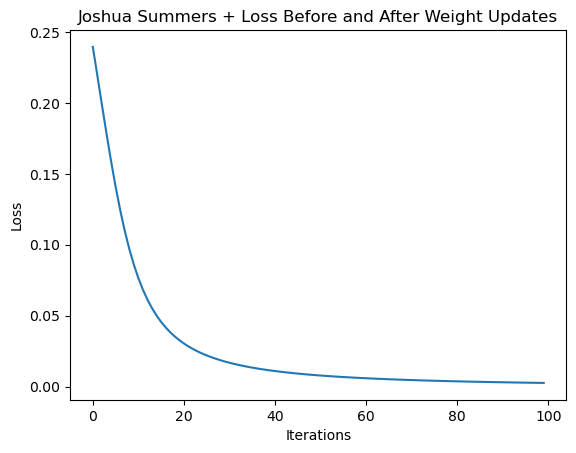

In [45]:
def compute_loss(y_true, y_pred):
    """
    Compute the Mean Squared Error (MSE) loss.
    Arguments:
        y_true: Ground truth labels (numpy array).
        y_pred: Predicted output from the network (numpy array).
    Returns:
        Mean Squared Error (scalar value).
    """
    return np.mean((y_true - y_pred) ** 2)

import matplotlib.pyplot as plt

# Training Loop
losses = []  # List to store the loss at each iteration
learning_rate = 0.6  # Learning rate for weight updates

# Iterate over the number of training steps (100 iterations in this case)
for iteration in range(100):
    # Step 1: Perform forward propagation to compute the network's predictions
    activations = forward_propagationS(network, inputs)  # Forward pass
    
    # Step 2: Compute the loss (error) between the true labels and the predicted output
    loss = compute_loss(y_true, activations[-1])  # Loss for the current iteration
    losses.append(loss)  # Append the computed loss to the list
    
    # Step 3: Perform backpropagation to compute gradients and update weights
    network = backpropagation_with_updates(network, activations, y_true, learning_rate)

# Plot Loss
plt.plot(losses)  
plt.title("Joshua Summers + Loss Before and After Weight Updates") 
plt.xlabel("Iterations")  
plt.ylabel("Loss")  
plt.show()  
